1. Qual a frequência dos valores da variável X de maneira global? E quando correlacionada à classe A? Podemos atribuir essa frequência a uma distribuição conhecida (normal, linear, uniforme, etc)?
2. Qual a correlação entre as variáveis X e Y? É linear crescente, descrescente? Não existe relação?
3. Quantas são as ocorrências de valores faltantes entre os dados? Em quais classes essas ocorrências são mais expressivas e menos expressivas?
4. Qual a dispersão das variável X? Essa variação muda se observarmos X apenas em função da classe A?
5. Quais variáveis mudam mais quando se muda a classe observada? Quais variáveis não?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,cloud,individuo,radius_10_si,radius_10_cg,radius_11_si,radius_11_cf,radius_12_si,radius_12_cg,radius_13_si,radius_13_cg,...,k_150_si,k_150_cg,k_200_si,k_200_cg,k_250_si,k_250_cg,k_300_si,k_300_cg,type,expression
0,bs000_CR_RD_0.pcd,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CR,RD
1,bs000_PR_SD_0.pcd,0,-0.649802,0.002419,-0.642394,0.002175,-0.640623,0.002034,-0.638448,0.001796,...,-0.768947,0.006286,-0.715874,0.004485,-0.689118,0.003767,-0.668550,0.003307,PR,SD
2,bs000_LFAU_15_0.pcd,0,-0.874963,0.003855,-0.864182,0.003557,-0.848145,0.003285,-0.832725,0.002924,...,-0.821884,0.006602,-0.850695,0.006289,-0.882629,0.005905,-0.897227,0.005460,LFAU,15
3,bs000_O_GLASSES_0.pcd,0,-0.836453,0.005631,-0.829042,0.004838,-0.813432,0.004051,-0.774520,0.003284,...,-0.928108,0.004075,-0.898174,0.004566,-0.876780,0.005194,-0.859757,0.005701,O,GLASSES
4,bs000_UFAU_44_0.pcd,0,-0.742564,0.002975,-0.732708,0.002898,-0.723416,0.002712,-0.709675,0.002410,...,-0.777874,0.001795,-0.759829,0.002204,-0.751591,0.002476,-0.753663,0.002734,UFAU,44


In [3]:
columns = df.columns[2:-2] # only shape index and gaussian curvature column values

## Correlation Matrix

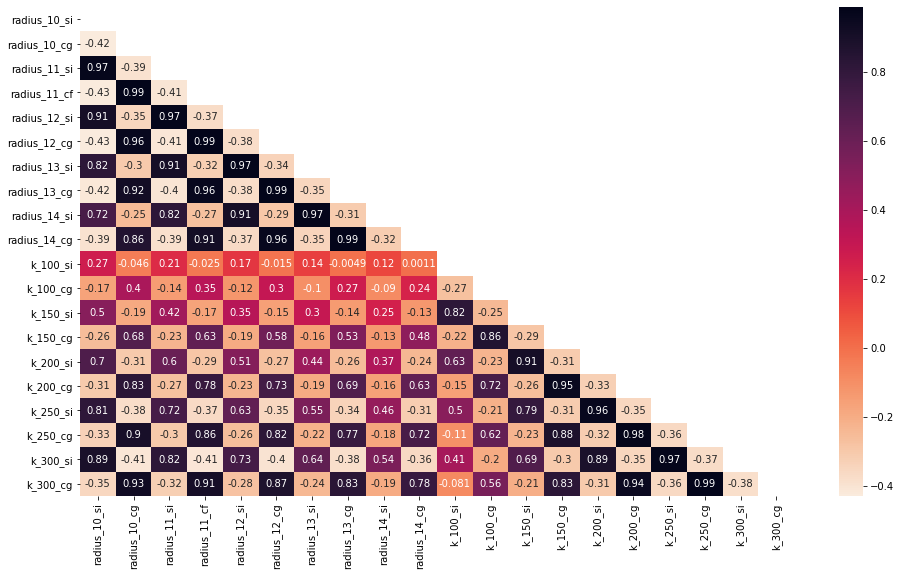

In [4]:
corr = df[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.cm.rocket_r)
plt.show()

In [5]:
# plot_histograms is a function that plot subplots of histograms based on expression. If expression
# is None, the complete dataframe will be used.
def plot_histograms(df, expression=None):
    nrows, ncols = 4, 5 
    fig, axes = plt.subplots(nrows, ncols)
    fig.tight_layout()
    
    if expression is not None:
        df = df.loc[df['expression'] == expression]

    i, j = 0, 0 # refactor
    for index, column in enumerate(columns):
        df.hist(ax=axes[i, j], column=[column], bins=10) # What is the better bins to use? 10 is default.
        j += 1
        if j == 5:
            i += 1
            j = 0

    plt.show()

## Global Frequency

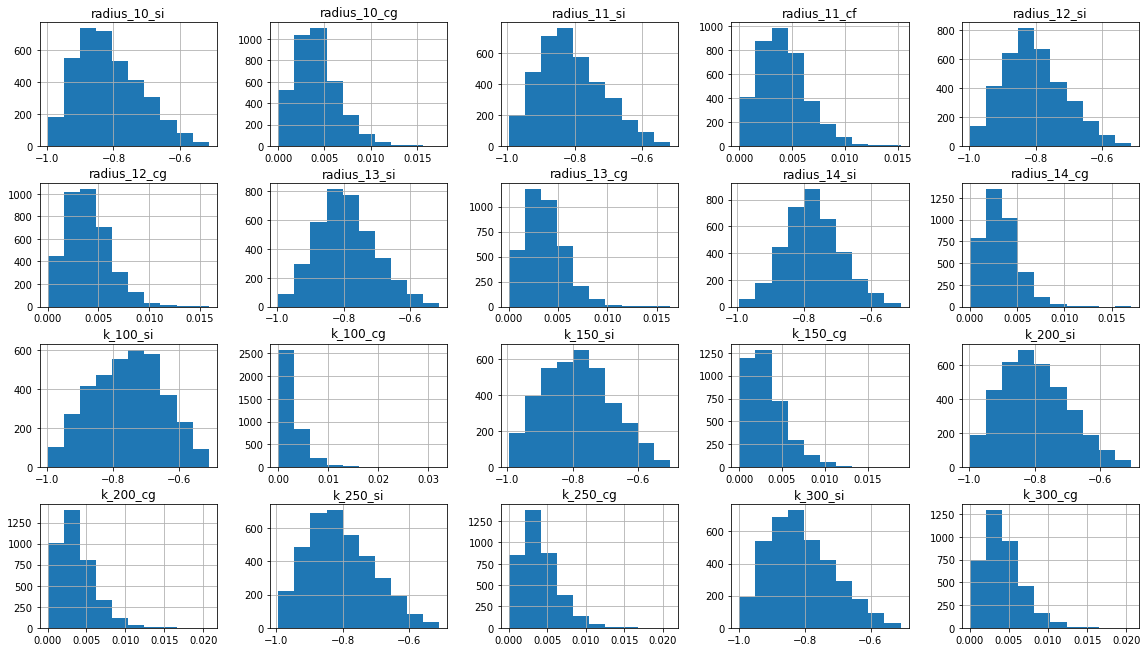

In [6]:
plot_histograms(df)

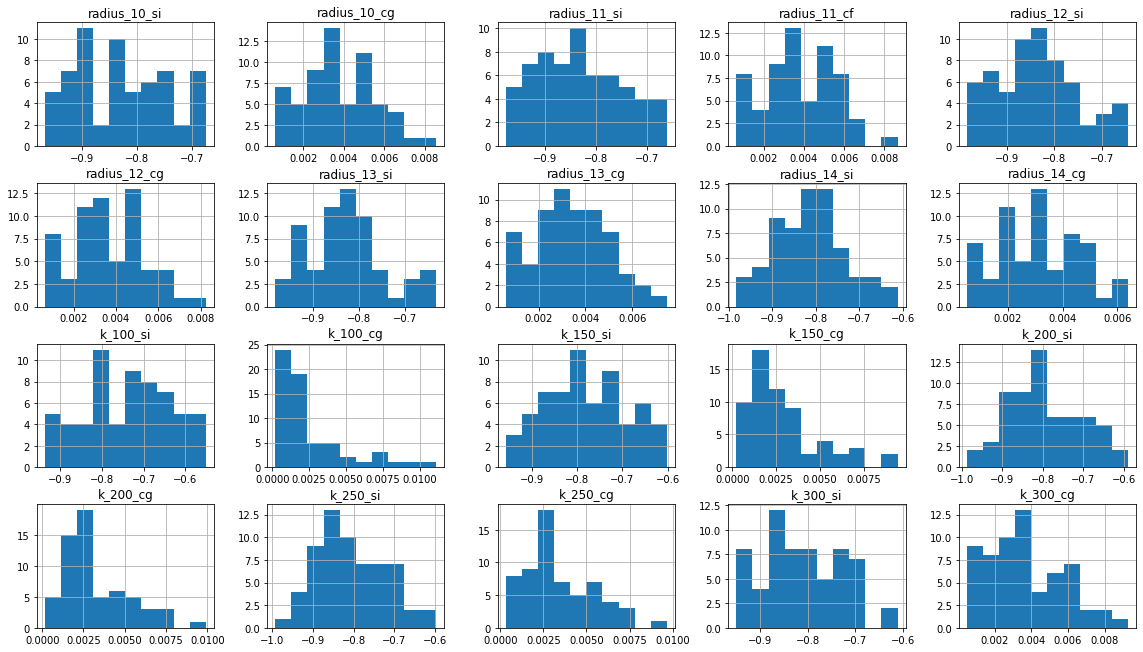

In [7]:
plot_histograms(df, expression='FEAR')

### Plot only one histogram for better visualization

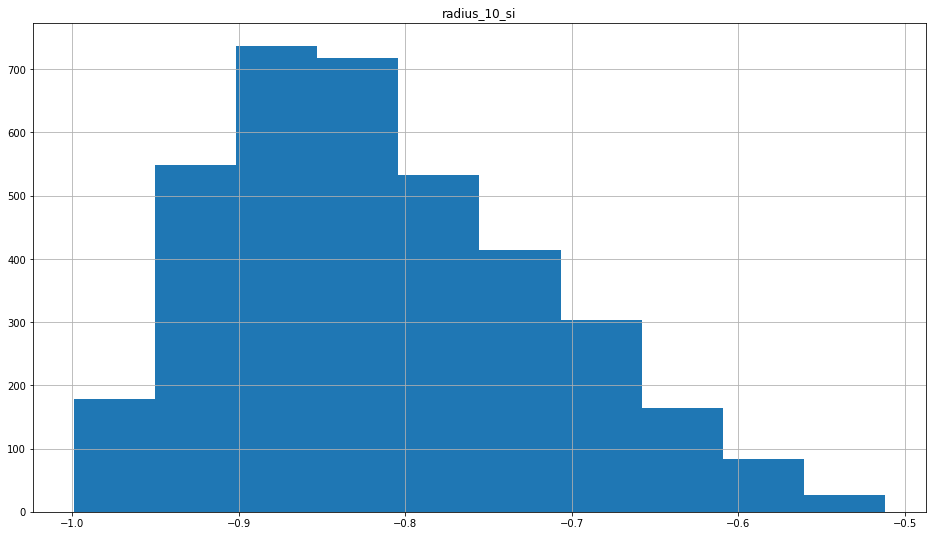

In [8]:
column = 'radius_10_si'
hist = df.hist(column=column, bins=10)
plt.show()

## Null values

Number of null values in the dataset. If there is a null value in one column, all other columns will also have null values. So this operation below shows how many null rows we have.

In [9]:
df['radius_10_si'].isna().sum()

958

But how many null lines are there for each class?

In [10]:
# TODO: Are these expressions right? I'll check the bosphorus documentation.

expressions = df['expression'].unique()

for expression in expressions:
    total = df['radius_10_si'].loc[df['expression'] == expression].isna().sum()
    print(f'Expression: {expression} - {total}')

Expression: RD - 65
Expression: SD - 10
Expression: 15 - 10
Expression: GLASSES - 7
Expression: 44 - 9
Expression: L45 - 9
Expression: 27 - 8
Expression: R10 - 15
Expression: 22 - 11
Expression: L90 - 103
Expression: 26 - 9
Expression: DISGUST - 10
Expression: 9 - 9
Expression: RU - 62
Expression: 4 - 10
Expression: R45 - 100
Expression: A22A25 - 8
Expression: FEAR - 8
Expression: SU - 8
Expression: HAPPY - 14
Expression: 34 - 6
Expression: R20 - 17
Expression: 20 - 8
Expression: N - 17
Expression: 14 - 9
Expression: 28 - 8
Expression: R30 - 47
Expression: 25 - 11
Expression: EYE - 49
Expression: U - 10
Expression: 23 - 9
Expression: 24 - 7
Expression: 12 - 8
Expression: R90 - 105
Expression: 10 - 9
Expression: A26A12lw - 9
Expression: SADNESS - 8
Expression: 12LW - 9
Expression: HAIR - 16
Expression: D - 12
Expression: ANGER - 7
Expression: 18 - 11
Expression: 16 - 9
Expression: 2 - 5
Expression: 12L - 10
Expression: MOUTH - 5
Expression: 17 - 9
Expression: SURPRISE - 16
Expression: 4

## Variances

In [11]:
variances = df[columns].var()
variances

radius_10_si    0.009342
radius_10_cg    0.000005
radius_11_si    0.008948
radius_11_cf    0.000005
radius_12_si    0.008344
radius_12_cg    0.000005
radius_13_si    0.007661
radius_13_cg    0.000004
radius_14_si    0.006914
radius_14_cg    0.000003
k_100_si        0.011268
k_100_cg        0.000006
k_150_si        0.010619
k_150_cg        0.000005
k_200_si        0.009906
k_200_cg        0.000006
k_250_si        0.009732
k_250_cg        0.000006
k_300_si        0.009610
k_300_cg        0.000006
dtype: float64

Largest variance:

In [12]:
variances.idxmax()

'k_100_si'

Lowest variância:

In [13]:
variances.idxmin()

'radius_14_cg'

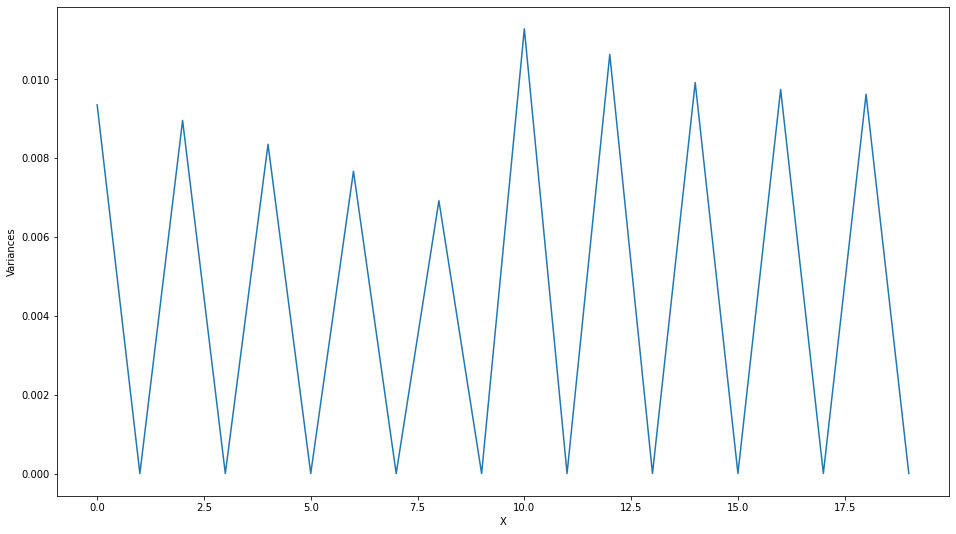

In [14]:
plt.plot(range(len(variances)), variances.values)
plt.xlabel('X')
plt.ylabel('Variances')
plt.show()

## Means

In [15]:
means = df[columns].mean()
means

radius_10_si   -0.813657
radius_10_cg    0.004197
radius_11_si   -0.810888
radius_11_cf    0.004153
radius_12_si   -0.804067
radius_12_cg    0.003970
radius_13_si   -0.791695
radius_13_cg    0.003666
radius_14_si   -0.773933
radius_14_cg    0.003272
k_100_si       -0.755051
k_100_cg        0.002765
k_150_si       -0.785965
k_150_cg        0.003280
k_200_si       -0.798748
k_200_cg        0.003690
k_250_si       -0.806272
k_250_cg        0.003997
k_300_si       -0.810751
k_300_cg        0.004215
dtype: float64

Largest mean:

In [16]:
means.idxmax()

'k_300_cg'

Lowest mean:

In [17]:
means.idxmin()

'radius_10_si'

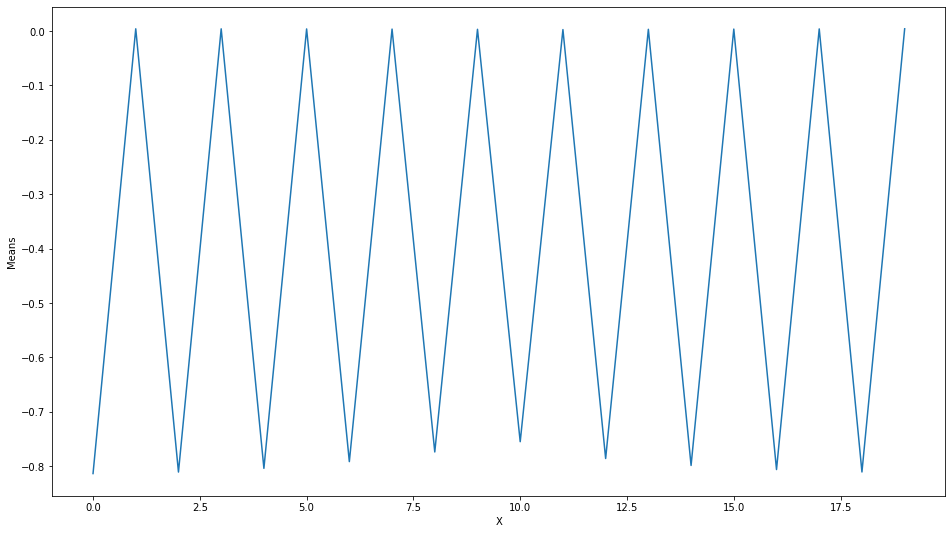

In [18]:
plt.plot(range(len(means)), means.values)
plt.xlabel('X')
plt.ylabel('Means')
plt.show()